In [1]:
import numpy as np 
import pandas as pd 

In [2]:
rides = pd.read_csv('day.csv')
rides.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
dummy_fields = ['season', 'weathersit', 'mnth', 'yr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'yr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,mnth_12,yr_0,yr_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0.344167,0.805833,0.160446,331,654,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0.363478,0.696087,0.248539,131,670,801,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0.196364,0.437273,0.248309,120,1229,1349,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0.200000,0.590435,0.160296,108,1454,1562,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0.226957,0.436957,0.186900,82,1518,1600,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [4]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [5]:
target_fields = ['cnt', 'casual', 'registered']
x, y = data.drop(target_fields, axis=1), data[target_fields]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [8]:
import NeuralNetwork

In [39]:
NN = NeuralNetwork.N_N_L(lr = 0.2, n_h=6)

In [46]:
parameters, costs= NN.train(x_train.values.T, y_train.iloc[:,1].values.reshape(1, 511), n_iteration = 500000, print_cost=50000)

the cost at the loop number 0 is  239458.60279823295
the cost at the loop number 50000 is  29231.06665723282
the cost at the loop number 100000 is  20652.14147258916
the cost at the loop number 150000 is  17922.027431557442
the cost at the loop number 200000 is  16509.95088998498
the cost at the loop number 250000 is  15575.80131922728
the cost at the loop number 300000 is  14858.484214999491
the cost at the loop number 350000 is  14241.02125996764
the cost at the loop number 400000 is  13667.362724040357
the cost at the loop number 450000 is  13112.100977647322


In [12]:
import matplotlib.pyplot as plt

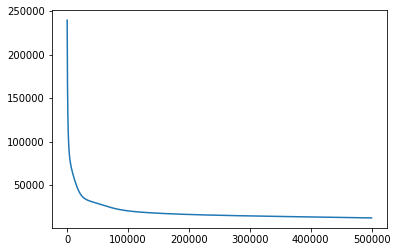

In [47]:
plt.plot(range(len(costs)),costs)

In [48]:
y_pred = NN.predict(parameters,x_test.values.T)

In [49]:
print('absolute error : ',np.sum(np.absolute(y_pred-y_test.iloc[:,1].values.reshape(y_pred.shape)))/y_pred.shape[1] )

absolute error :  0.27821455107754595


In [50]:
mean, std = scaled_features['cnt']
y_test_t = y_test.iloc[:,1].values.reshape(y_pred.shape)
y_test_t = (y_test_t* std) + mean
y_pred_t = (y_pred*std)+mean

In [51]:
print('absolute error : ',np.mean(np.absolute(y_pred_t-y_test_t)))

absolute error :  538.9604143543967
